# 바텀 라인의 영향력 분석

* end데이터와 15데이터가 겹치는 부분이 kda 밖에 없는 이유
    * 그 외에 터렛 파괴, 데미지, 경험치 등은 시간에 따라 당연히 상승하며, 게임 시간 길이에 따라 편차가 크므로 분석에 적합하지 않다고 판단.

# 1. 환경 준비

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings

# warnings.filterwarnings(action='ignore')
# %config InlineBackend.figure_format='retina'

In [2]:
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [11]:
# 데이터 불러오기
data = pd.read_excel('data/match_log_data.xlsx')
data.head(2)

,puuid,matchid,win,kills,deaths,assists,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15
0,ZPFTEsnEwgz0EfXyXbdlj3HIzoKdjLJmkM4p8v4H9EYlEW...,KR_6611771034,True,19,2,5,0,5,3,70886,9620,5167,10,6813,150,8133,4,0,2
1,ZPFTEsnEwgz0EfXyXbdlj3HIzoKdjLJmkM4p8v4H9EYlEW...,KR_6611825559,False,7,4,8,450,2,10,50995,9032,4973,9,5170,126,6097,2,2,3


In [3]:
# 변수 제거
drop_cols = ['puuid', 'matchid']

data.drop(drop_cols, axis=1, inplace=True)

# 2. 데이터 이해

In [4]:
# 데이터 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   win                           250 non-null    bool 
 1   kills                         250 non-null    int64
 2   deaths                        250 non-null    int64
 3   assists                       250 non-null    int64
 4   bountyGold                    250 non-null    int64
 5   turretKills                   250 non-null    int64
 6   turretsLost                   250 non-null    int64
 7   totalDamageDone15             250 non-null    int64
 8   totalDamageDoneToChampions15  250 non-null    int64
 9   totalDamageTaken15            250 non-null    int64
 10  level15                       250 non-null    int64
 11  xp15                          250 non-null    int64
 12  minionsKilled15               250 non-null    int64
 13  totalGold15                   250 n

In [5]:
# 승패 비율 확인
data['win'].value_counts()

True     130
False    120
Name: win, dtype: int64

In [5]:
# DivisionByZero 방지를 위해 0 death는 1 death로 변경
data.loc[data['deaths'] == 0, 'deaths'] = 1
data.loc[data['deaths15'] == 0, 'deaths15'] = 1
data['KDA'] = (data['kills'] + data['assists']) / data['deaths']
data['KDA15'] = (data['kills15'] + data['assists15']) / data['deaths15']

In [6]:
col1 = data.columns[:4].to_list()
col2 = data.columns[4:17].to_list()

In [7]:
new_col = col1 + ['KDA'] + col2 + ['KDA15']
print(new_col)

['win', 'kills', 'deaths', 'assists', 'KDA', 'bountyGold', 'turretKills', 'turretsLost', 'totalDamageDone15', 'totalDamageDoneToChampions15', 'totalDamageTaken15', 'level15', 'xp15', 'minionsKilled15', 'totalGold15', 'kills15', 'deaths15', 'assists15', 'KDA15']


In [8]:
data = data[new_col]
data.head()

,win,kills,deaths,assists,KDA,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA15
0,True,19,2,5,12.00,0,5,3,70886,9620,5167,10,6813,150,8133,4,1,2,6.000000
1,False,7,4,8,3.75,450,2,10,50995,9032,4973,9,5170,126,6097,2,2,3,2.500000
2,True,8,4,8,4.00,0,4,3,39510,5148,8499,8,4961,108,4679,1,3,1,0.666667
3,True,13,1,3,16.00,0,4,3,53311,4102,2082,9,5586,138,7735,3,1,1,4.000000
4,False,2,8,6,1.00,0,0,10,40709,5587,6992,9,5243,116,5821,0,4,5,1.250000


In [9]:
data.describe()

,kills,deaths,assists,KDA,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA15
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.00000,250.000000
mean,8.908000,6.124000,8.060000,3.938863,366.500000,1.928000,6.048000,47760.400000,6387.184000,6231.316000,8.588000,5207.852000,112.592000,6050.94800,2.680000,2.196000,2.28000,3.099333
std,5.160432,2.827828,3.918907,3.805995,458.339996,1.729387,3.506405,10703.479657,2341.453578,1653.102181,0.660303,602.778438,16.488573,1000.31459,1.926772,1.234374,1.59618,2.371239
min,0.000000,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,23563.000000,782.000000,2082.000000,7.000000,3725.000000,55.000000,3733.00000,0.000000,1.000000,0.00000,0.000000
25%,5.000000,4.000000,5.000000,1.750000,0.000000,0.000000,3.000000,40240.750000,4631.500000,5168.500000,8.000000,4768.250000,101.000000,5380.50000,1.000000,1.000000,1.00000,1.250000
50%,8.000000,6.000000,7.000000,2.875000,150.000000,2.000000,7.000000,47461.500000,6197.500000,6164.500000,9.000000,5159.000000,114.000000,5954.50000,2.000000,2.000000,2.00000,2.500000
75%,11.000000,8.000000,10.000000,4.312500,637.500000,3.000000,9.000000,54738.500000,7816.000000,7127.750000,9.000000,5632.250000,124.000000,6713.75000,4.000000,3.000000,3.00000,4.375000
max,33.000000,15.000000,19.000000,25.000000,2225.000000,8.000000,11.000000,78631.000000,15387.000000,11805.000000,10.000000,6914.000000,150.000000,9705.00000,8.000000,5.000000,8.00000,12.000000


### 0. 데이터 분할

In [4]:
col_end = list(data)[:8]
col_15 = list(data)[8:]
print(col_end)
print(col_15)

['win', 'kills', 'deaths', 'assists', 'bountyGold', 'turretKills', 'turretsLost', 'totalDamageDone15']
['totalDamageDoneToChampions15', 'totalDamageTaken15', 'level15', 'xp15', 'minionsKilled15', 'totalGold15', 'kills15', 'deaths15', 'assists15']


In [19]:
data_win = data[data['win'] == True]
data_lose = data[data['win'] == False]

data_end = data.loc[:, col_end]
data_15 = data.loc[:, ['win'] + col_15]

In [ ]:
data_win.to_excel('data_win.xlsx', index=False)
data_lose.to_excel('data_lose.xlsx', index=False)

data_end.to_excel('data_end.xlsx', index=False)
data_15.to_excel('data_15.xlsx', index=False)

In [6]:
data_win = pd.read_excel('data/data_win.xlsx')
data_lose = pd.read_excel('data/data_lose.xlsx')

data_end = pd.read_excel('data/data_end.xlsx')
data_15 = pd.read_excel('data/data_15.xlsx')

In [7]:
col_end = list(data_end)
col_15 = list(data_15)
print(col_end)
print(col_15)

['win', 'kills', 'deaths', 'assists', 'KDA', 'bountyGold', 'turretKills', 'turretsLost']
['win', 'totalDamageDone15', 'totalDamageDoneToChampions15', 'totalDamageTaken15', 'level15', 'xp15', 'minionsKilled15', 'totalGold15', 'kills15', 'deaths15', 'assists15', 'KDA15']


### 1. 승리 데이터 분석

In [24]:
# 승리 데이터 요약
data_win.describe()

,kills,deaths,assists,KDA,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA15
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,10.023077,5.169231,9.492308,5.538642,251.730769,2.823077,3.176923,48005.169231,6409.669231,6205.176923,8.607692,5243.546154,113.384615,6122.076923,2.830769,2.138462,2.430769,3.415256
std,5.120964,2.806798,3.922201,4.603851,403.355457,1.718415,2.028729,10792.181844,2382.730205,1728.000446,0.652914,599.546342,16.511394,1029.695820,2.015977,1.231082,1.688715,2.612454
min,1.000000,1.000000,1.000000,0.600000,0.000000,0.000000,0.000000,23563.000000,1444.000000,2082.000000,7.000000,3725.000000,68.000000,3733.000000,0.000000,1.000000,0.000000,0.000000
25%,6.000000,3.000000,7.000000,2.781250,0.000000,2.000000,2.000000,40363.000000,4574.750000,5074.750000,8.000000,4858.000000,102.000000,5444.500000,1.000000,1.000000,1.000000,1.270833
50%,9.500000,5.000000,9.000000,4.000000,0.000000,3.000000,3.000000,48543.000000,6199.000000,6013.500000,9.000000,5182.500000,115.000000,6003.000000,3.000000,2.000000,2.000000,3.000000
75%,13.000000,7.000000,11.750000,6.712500,450.000000,4.000000,4.000000,55552.750000,7825.000000,7138.250000,9.000000,5667.500000,124.750000,6807.000000,4.000000,3.000000,3.000000,5.375000
max,25.000000,15.000000,19.000000,25.000000,2225.000000,8.000000,8.000000,70886.000000,15387.000000,11805.000000,10.000000,6818.000000,150.000000,9705.000000,8.000000,5.000000,8.000000,12.000000


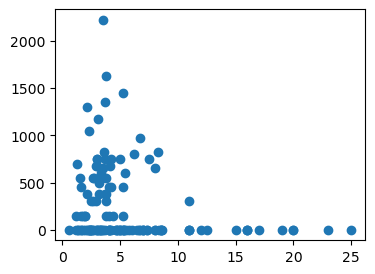

In [31]:
plt.figure(figsize=(4,3))
plt.scatter(data_win['KDA'], data_win['bountyGold'])
plt.show()

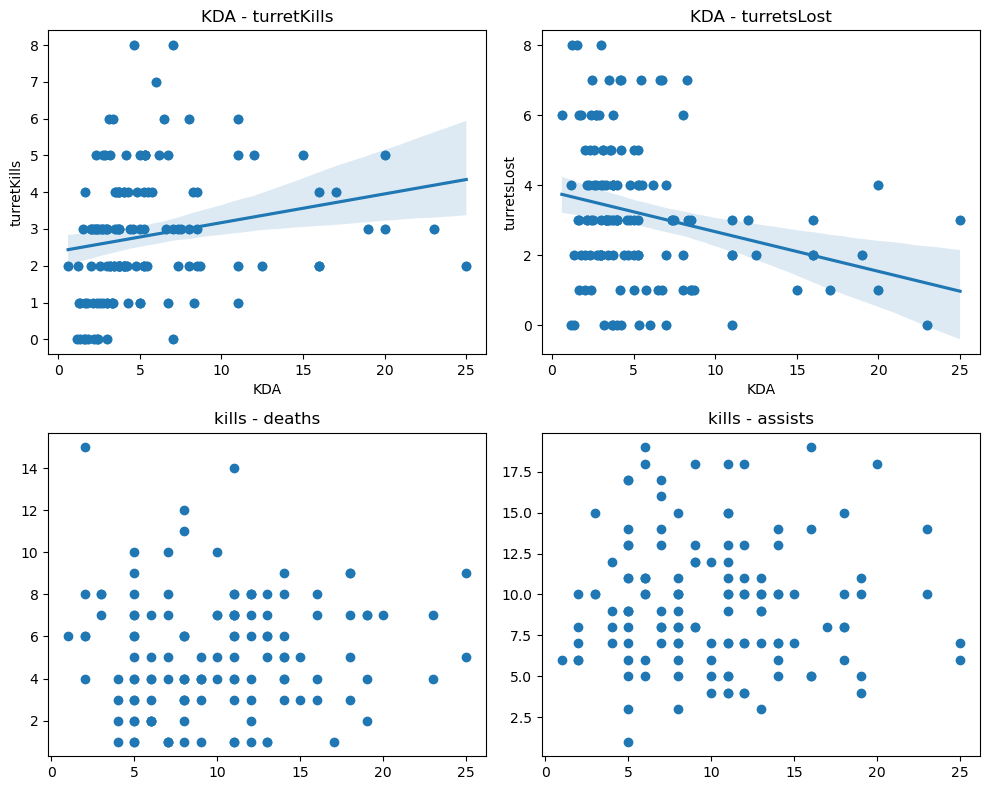

In [37]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.scatter(data_win['KDA'], data_win['turretKills'])
sns.regplot(x='KDA', y='turretKills', data=data_win)
plt.gca().set_title('KDA - turretKills')

plt.subplot(2,2,2)
plt.scatter(data_win['KDA'], data_win['turretsLost'])
sns.regplot(x='KDA', y='turretsLost', data=data_win)
plt.gca().set_title('KDA - turretsLost')

plt.subplot(2,2,3)
plt.scatter(data_win['kills'], data_win['deaths'])
plt.gca().set_title('kills - deaths')

plt.subplot(2,2,4)
plt.scatter(data_win['kills'], data_win['assists'])
plt.gca().set_title('kills - assists')

plt.tight_layout()
plt.show()

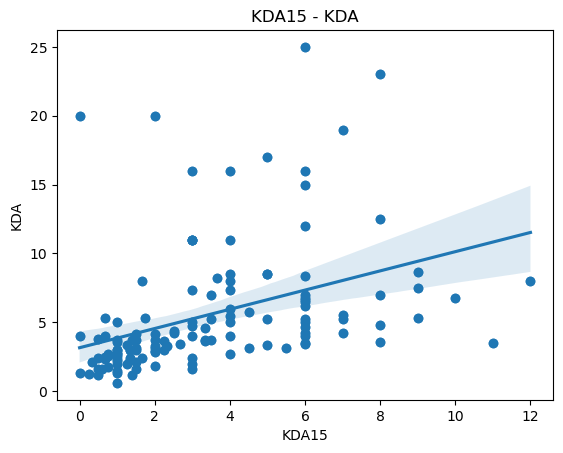

In [28]:
plt.scatter(data_win['KDA15'], data_win['KDA'])
sns.regplot(x='KDA15', y='KDA', data=data_win)
plt.title('KDA15 - KDA')
plt.show()

In [25]:
data_win['KDA_change'] = data_win['KDA'] / data_win['KDA15']

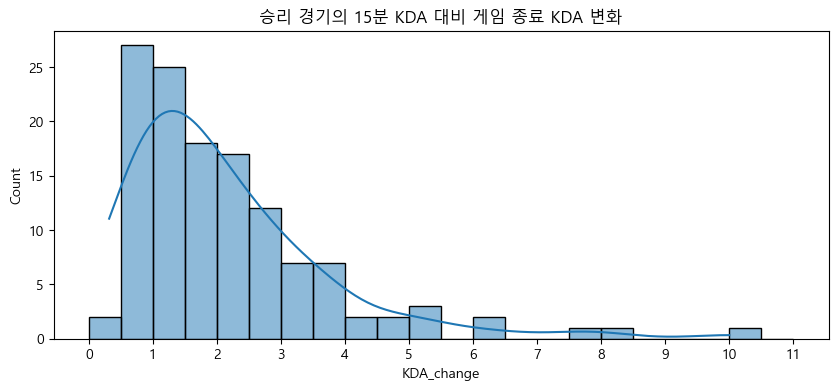

In [31]:
plt.figure(figsize=(10,4))
plt.xticks(ticks=np.arange(0, 12, 1))
sns.histplot(data_win['KDA_change'], binwidth=0.5, binrange=(0, 11), kde=True)
plt.title("승리 경기의 15분 KDA 대비 게임 종료 KDA 변화")
plt.show()

In [48]:
data_win[data_win['KDA_change'] == np.inf]

,win,kills,deaths,assists,KDA,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA15,KDA_change
9,True,4,3,8,4.000000,0,2,0,43747,3618,3556,9,5822,124,4888,0,1,0,0.0,inf
29,True,2,6,6,1.333333,0,1,2,50393,4212,4519,9,5344,126,4950,0,3,0,0.0,inf
36,True,13,1,7,20.000000,0,5,1,41332,2662,3302,8,5020,125,4807,0,1,0,0.0,inf


In [44]:
data_win[['KDA_change']].describe().T

,count,mean,std,min,25%,50%,75%,max
KDA_change,130.0,inf,NaN,0.318182,1.066752,1.68375,2.747024,inf


In [26]:
win_end = data_win.loc[:, col_end]
win_end.describe()

,kills,deaths,assists,KDA,bountyGold,turretKills,turretsLost
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,10.023077,5.169231,9.492308,5.538642,251.730769,2.823077,3.176923
std,5.120964,2.806798,3.922201,4.603851,403.355457,1.718415,2.028729
min,1.000000,1.000000,1.000000,0.600000,0.000000,0.000000,0.000000
25%,6.000000,3.000000,7.000000,2.781250,0.000000,2.000000,2.000000
50%,9.500000,5.000000,9.000000,4.000000,0.000000,3.000000,3.000000
75%,13.000000,7.000000,11.750000,6.712500,450.000000,4.000000,4.000000
max,25.000000,15.000000,19.000000,25.000000,2225.000000,8.000000,8.000000


In [17]:
win_15 = data_win.loc[:, col_15]
win_15.describe()

,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA15
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,48005.169231,6409.669231,6205.176923,8.607692,5243.546154,113.384615,6122.076923,2.830769,2.138462,2.430769,3.415256
std,10792.181844,2382.730205,1728.000446,0.652914,599.546342,16.511394,1029.695820,2.015977,1.231082,1.688715,2.612454
min,23563.000000,1444.000000,2082.000000,7.000000,3725.000000,68.000000,3733.000000,0.000000,1.000000,0.000000,0.000000
25%,40363.000000,4574.750000,5074.750000,8.000000,4858.000000,102.000000,5444.500000,1.000000,1.000000,1.000000,1.270833
50%,48543.000000,6199.000000,6013.500000,9.000000,5182.500000,115.000000,6003.000000,3.000000,2.000000,2.000000,3.000000
75%,55552.750000,7825.000000,7138.250000,9.000000,5667.500000,124.750000,6807.000000,4.000000,3.000000,3.000000,5.375000
max,70886.000000,15387.000000,11805.000000,10.000000,6818.000000,150.000000,9705.000000,8.000000,5.000000,8.000000,12.000000


### 2. 패배 데이터 분석

In [12]:
# 패배 데이터 요약
data_lose = data[data['win'] == False]
data_lose.describe()

,kills,deaths,assists,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,7.700000,7.158333,6.508333,490.833333,0.958333,9.158333,47495.233333,6362.82500,6259.633333,8.566667,5169.183333,111.733333,5973.891667,2.516667,2.141667,2.116667
std,4.946096,2.473374,3.284790,482.932800,1.110650,1.582445,10645.370312,2305.63224,1574.686246,0.670298,606.389355,16.489739,965.850422,1.819518,1.392029,1.479174
min,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,24036.000000,782.00000,2627.000000,7.000000,3882.000000,55.000000,3902.000000,0.000000,0.000000,0.000000
25%,4.750000,5.000000,4.000000,0.000000,0.000000,8.000000,40254.750000,4871.50000,5304.250000,8.000000,4710.750000,101.000000,5337.000000,1.000000,1.000000,1.000000
50%,7.000000,7.000000,6.000000,375.000000,1.000000,9.000000,47009.000000,6197.50000,6215.500000,9.000000,5141.500000,113.500000,5909.000000,2.000000,2.000000,2.000000
75%,9.250000,9.000000,8.000000,800.000000,2.000000,10.000000,54218.750000,7802.00000,7108.500000,9.000000,5616.500000,123.250000,6508.500000,3.000000,3.000000,3.000000
max,33.000000,13.000000,17.000000,2050.000000,4.000000,11.000000,78631.000000,13179.00000,10459.000000,10.000000,6914.000000,148.000000,8935.000000,8.000000,5.000000,6.000000


In [ ]:
data_lose.loc[data_lose['deaths15'] == 0, 'deaths15'] = 1

data_lose['KDA'] = (data_lose['kills'] + data_lose['assists']) / data_lose['deaths']
data_lose['KDA15'] = (data_lose['kills15'] + data_lose['assists15']) / data_lose['deaths15']

data_lose['KDA_change'] = data_lose['KDA'] / data_lose['KDA15']

In [14]:
data_lose.describe()

,kills,deaths,assists,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA,KDA15,KDA_change
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,7.700000,7.158333,6.508333,490.833333,0.958333,9.158333,47495.233333,6362.82500,6259.633333,8.566667,5169.183333,111.733333,5973.891667,2.516667,2.258333,2.116667,2.205769,2.757083,inf
std,4.946096,2.473374,3.284790,482.932800,1.110650,1.582445,10645.370312,2305.63224,1574.686246,0.670298,606.389355,16.489739,965.850422,1.819518,1.240059,1.479174,1.228375,2.034627,NaN
min,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,24036.000000,782.00000,2627.000000,7.000000,3882.000000,55.000000,3902.000000,0.000000,1.000000,0.000000,0.250000,0.000000,0.150000
25%,4.750000,5.000000,4.000000,0.000000,0.000000,8.000000,40254.750000,4871.50000,5304.250000,8.000000,4710.750000,101.000000,5337.000000,1.000000,1.000000,1.000000,1.328283,1.250000,0.604545
50%,7.000000,7.000000,6.000000,375.000000,1.000000,9.000000,47009.000000,6197.50000,6215.500000,9.000000,5141.500000,113.500000,5909.000000,2.000000,2.000000,2.000000,1.887500,2.000000,0.900000
75%,9.250000,9.000000,8.000000,800.000000,2.000000,10.000000,54218.750000,7802.00000,7108.500000,9.000000,5616.500000,123.250000,6508.500000,3.000000,3.000000,3.000000,2.800000,4.000000,1.417234
max,33.000000,13.000000,17.000000,2050.000000,4.000000,11.000000,78631.000000,13179.00000,10459.000000,10.000000,6914.000000,148.000000,8935.000000,8.000000,5.000000,6.000000,7.500000,10.000000,inf


In [15]:
data_lose.loc[data_lose['KDA_change'] == np.inf]

,win,kills,deaths,assists,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA,KDA15,KDA_change
7,False,5,7,2,500,0,8,29214,3939,7131,7,3997,94,4407,0,5,0,1.000000,0.0,inf
71,False,10,7,6,450,2,10,54748,782,2946,9,5972,148,5597,0,2,0,2.285714,0.0,inf
175,False,0,11,6,0,0,9,24036,2548,6601,7,3983,85,3961,0,4,0,0.545455,0.0,inf
180,False,0,4,1,0,2,8,60641,1852,3435,8,4666,140,4930,0,1,0,0.250000,0.0,inf


In [19]:
col1 = data_lose.columns[:4].to_list()
col2 = data_lose.columns[4:17].to_list()
print(col1)
print(col2)

['win', 'kills', 'deaths', 'assists']
['bountyGold', 'turretKills', 'turretsLost', 'totalDamageDone15', 'totalDamageDoneToChampions15', 'totalDamageTaken15', 'level15', 'xp15', 'minionsKilled15', 'totalGold15', 'kills15', 'deaths15', 'assists15']


In [20]:
new_col = col1 + ['KDA'] + col2 + ['KDA15', 'KDA_change']
print(new_col)

['win', 'kills', 'deaths', 'assists', 'KDA', 'bountyGold', 'turretKills', 'turretsLost', 'totalDamageDone15', 'totalDamageDoneToChampions15', 'totalDamageTaken15', 'level15', 'xp15', 'minionsKilled15', 'totalGold15', 'kills15', 'deaths15', 'assists15', 'KDA15', 'KDA_change']


In [22]:
new_col = ['win', 'kills', 'deaths', 'assists', 'KDA', 'bountyGold', 'turretKills', 'turretsLost', 'totalDamageDone15', 'totalDamageDoneToChampions15', 'totalDamageTaken15', 'level15', 'xp15', 'minionsKilled15', 'totalGold15', 'kills15', 'deaths15', 'assists15', 'KDA15', 'KDA_change']

In [21]:
data_lose = data_lose[new_col]
data_lose.head()

,win,kills,deaths,assists,KDA,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA15,KDA_change
1,False,7,4,8,3.750000,450,2,10,50995,9032,4973,9,5170,126,6097,2,2,3,2.50,1.500000
4,False,2,8,6,1.000000,0,0,10,40709,5587,6992,9,5243,116,5821,0,4,5,1.25,0.800000
5,False,20,7,6,3.714286,1750,2,10,58291,5807,7832,9,5978,119,6099,1,2,3,2.00,1.857143
7,False,5,7,2,1.000000,500,0,8,29214,3939,7131,7,3997,94,4407,0,5,0,0.00,inf
8,False,9,5,7,3.200000,300,0,8,51296,10665,6927,10,6174,119,6574,3,3,3,2.00,1.600000


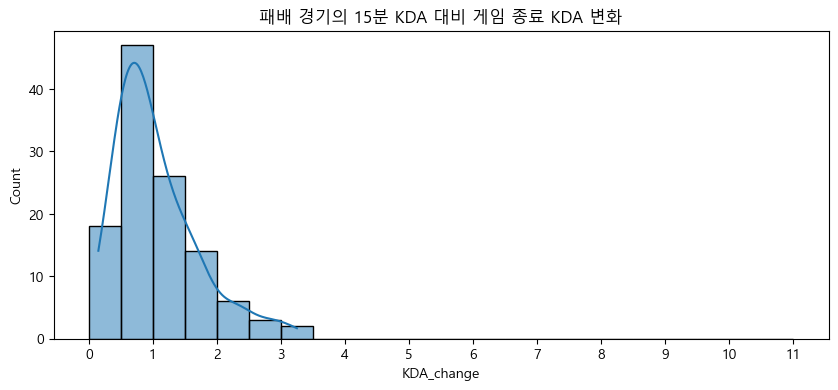

In [33]:
plt.figure(figsize=(10,4))
plt.xticks(ticks=np.arange(0, 12, 1))
sns.histplot(data_lose['KDA_change'], binwidth=0.5, binrange=(0, 11), kde=True)
plt.title("패배 경기의 15분 KDA 대비 게임 종료 KDA 변화")
plt.show()

### 3. 전체kda vs 15분kda

In [12]:
kda_toal = data.loc[:, ['kills', 'deaths', 'assists']]
kda_15 = data.loc[:, ['kills15', 'deaths15', 'assists15']]

display(kda_toal.describe())
display(kda_15.describe())

,kills,deaths,assists
count,250.000000,250.000000,250.000000
mean,8.908000,6.108000,8.060000
std,5.160432,2.859553,3.918907
min,0.000000,0.000000,0.000000
25%,5.000000,4.000000,5.000000
50%,8.000000,6.000000,7.000000
75%,11.000000,8.000000,10.000000
max,33.000000,15.000000,19.000000


,kills15,deaths15,assists15
count,250.000000,250.000000,250.00000
mean,2.680000,2.052000,2.28000
std,1.926772,1.411832,1.59618
min,0.000000,0.000000,0.00000
25%,1.000000,1.000000,1.00000
50%,2.000000,2.000000,2.00000
75%,4.000000,3.000000,3.00000
max,8.000000,5.000000,8.00000


In [18]:
data2 = data.copy()

print("0데스 수:", len(data2.loc[data2['deaths'] == 0, 'deaths']))
print("15분 0데스 수:", len(data2.loc[data2['deaths15'] == 0, 'deaths15']))

0데스 수: 4
15분 0데스 수: 36


In [19]:
data2 = data2.drop(['puuid', 'matchid'], axis=1)

In [20]:
data2.loc[data2['deaths'] == 0, 'deaths'] = 1
data2.loc[data2['deaths15'] == 0, 'deaths15'] = 1

data2['KDA'] = (data2['kills'] + data2['assists']) / data2['deaths']
data2['KDA15'] = (data2['kills15'] + data2['assists15']) / data2['deaths15']

data2['KDA_change'] = data2['KDA'] / data2['KDA15']

display(data2.head())
display(data2.describe())

,win,kills,deaths,assists,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA,KDA15,KDA_change
0,True,19,2,5,0,5,3,70886,9620,5167,10,6813,150,8133,4,1,2,12.00,6.000000,2.0
1,False,7,4,8,450,2,10,50995,9032,4973,9,5170,126,6097,2,2,3,3.75,2.500000,1.5
2,True,8,4,8,0,4,3,39510,5148,8499,8,4961,108,4679,1,3,1,4.00,0.666667,6.0
3,True,13,1,3,0,4,3,53311,4102,2082,9,5586,138,7735,3,1,1,16.00,4.000000,4.0
4,False,2,8,6,0,0,10,40709,5587,6992,9,5243,116,5821,0,4,5,1.00,1.250000,0.8


,kills,deaths,assists,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA,KDA15,KDA_change
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000
mean,8.908000,6.124000,8.060000,366.500000,1.928000,6.048000,47760.400000,6387.184000,6231.316000,8.588000,5207.852000,112.592000,6050.94800,2.680000,2.196000,2.28000,3.938863,3.099333,inf
std,5.160432,2.827828,3.918907,458.339996,1.729387,3.506405,10703.479657,2341.453578,1653.102181,0.660303,602.778438,16.488573,1000.31459,1.926772,1.234374,1.59618,3.805995,2.371239,NaN
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,23563.000000,782.000000,2082.000000,7.000000,3725.000000,55.000000,3733.00000,0.000000,1.000000,0.00000,0.250000,0.000000,0.150000
25%,5.000000,4.000000,5.000000,0.000000,0.000000,3.000000,40240.750000,4631.500000,5168.500000,8.000000,4768.250000,101.000000,5380.50000,1.000000,1.000000,1.00000,1.750000,1.250000,0.728788
50%,8.000000,6.000000,7.000000,150.000000,2.000000,7.000000,47461.500000,6197.500000,6164.500000,9.000000,5159.000000,114.000000,5954.50000,2.000000,2.000000,2.00000,2.875000,2.500000,1.278889
75%,11.000000,8.000000,10.000000,637.500000,3.000000,9.000000,54738.500000,7816.000000,7127.750000,9.000000,5632.250000,124.000000,6713.75000,4.000000,3.000000,3.00000,4.312500,4.375000,2.156250
max,33.000000,15.000000,19.000000,2225.000000,8.000000,11.000000,78631.000000,15387.000000,11805.000000,10.000000,6914.000000,150.000000,9705.00000,8.000000,5.000000,8.00000,25.000000,12.000000,inf


In [21]:
data2[data2['KDA_change'] == np.inf]

,win,kills,deaths,assists,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA,KDA15,KDA_change
7,False,5,7,2,500,0,8,29214,3939,7131,7,3997,94,4407,0,5,0,1.000000,0.0,inf
23,True,4,3,8,0,2,0,43747,3618,3556,9,5822,124,4888,0,1,0,4.000000,0.0,inf
60,True,2,6,6,0,1,2,50393,4212,4519,9,5344,126,4950,0,3,0,1.333333,0.0,inf
71,False,10,7,6,450,2,10,54748,782,2946,9,5972,148,5597,0,2,0,2.285714,0.0,inf
76,True,13,1,7,0,5,1,41332,2662,3302,8,5020,125,4807,0,1,0,20.000000,0.0,inf
175,False,0,11,6,0,0,9,24036,2548,6601,7,3983,85,3961,0,4,0,0.545455,0.0,inf
180,False,0,4,1,0,2,8,60641,1852,3435,8,4666,140,4930,0,1,0,0.250000,0.0,inf


In [23]:
data2 = data2[new_col]
data2.head()

,win,kills,deaths,assists,KDA,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA15,KDA_change
0,True,19,2,5,12.00,0,5,3,70886,9620,5167,10,6813,150,8133,4,1,2,6.000000,2.0
1,False,7,4,8,3.75,450,2,10,50995,9032,4973,9,5170,126,6097,2,2,3,2.500000,1.5
2,True,8,4,8,4.00,0,4,3,39510,5148,8499,8,4961,108,4679,1,3,1,0.666667,6.0
3,True,13,1,3,16.00,0,4,3,53311,4102,2082,9,5586,138,7735,3,1,1,4.000000,4.0
4,False,2,8,6,1.00,0,0,10,40709,5587,6992,9,5243,116,5821,0,4,5,1.250000,0.8


In [24]:
data2.to_excel('data/data_KDA_change.xlsx', index=False)

In [26]:
data2 = pd.read_excel('data/data_KDA_change.xlsx')
data2.head()

,win,kills,deaths,assists,KDA,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA15,KDA_change
0,True,19,2,5,12.00,0,5,3,70886,9620,5167,10,6813,150,8133,4,1,2,6.000000,2.0
1,False,7,4,8,3.75,450,2,10,50995,9032,4973,9,5170,126,6097,2,2,3,2.500000,1.5
2,True,8,4,8,4.00,0,4,3,39510,5148,8499,8,4961,108,4679,1,3,1,0.666667,6.0
3,True,13,1,3,16.00,0,4,3,53311,4102,2082,9,5586,138,7735,3,1,1,4.000000,4.0
4,False,2,8,6,1.00,0,0,10,40709,5587,6992,9,5243,116,5821,0,4,5,1.250000,0.8


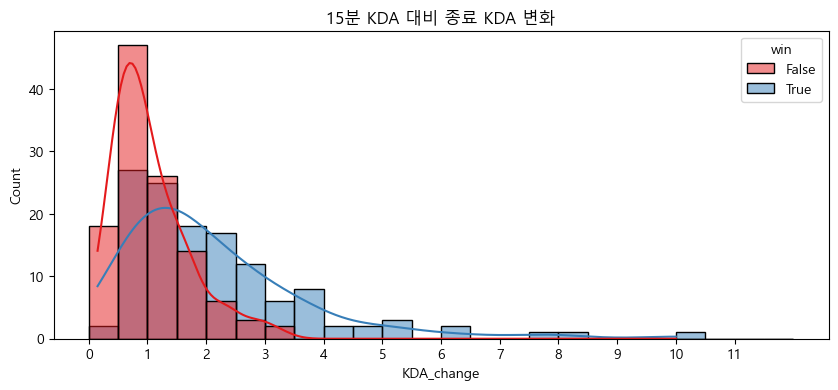

In [4]:
plt.figure(figsize=(10,4))
plt.xticks(ticks=np.arange(0, 12, 1))
sns.histplot(data=data2, x='KDA_change', hue='win',
             palette='Set1',
             binwidth=0.5, binrange=(0, 12), kde=True)
plt.title("15분 KDA 대비 종료 KDA 변화")
plt.show()

* KDA 변화량이 1 이상인 횟수는 승리시가 패배시보다 많다.

In [36]:
data2

,win,kills,deaths,assists,KDA,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA15,KDA_change
0,True,19,2,5,12.000000,0,5,3,70886,9620,5167,10,6813,150,8133,4,1,2,6.000000,2.000000
1,False,7,4,8,3.750000,450,2,10,50995,9032,4973,9,5170,126,6097,2,2,3,2.500000,1.500000
2,True,8,4,8,4.000000,0,4,3,39510,5148,8499,8,4961,108,4679,1,3,1,0.666667,6.000000
3,True,13,1,3,16.000000,0,4,3,53311,4102,2082,9,5586,138,7735,3,1,1,4.000000,4.000000
4,False,2,8,6,1.000000,0,0,10,40709,5587,6992,9,5243,116,5821,0,4,5,1.250000,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,False,9,11,10,1.727273,150,3,9,54007,11141,8027,9,5105,101,6908,3,3,4,2.333333,0.740260
246,True,14,5,10,4.800000,0,4,4,49023,11828,6842,8,4991,96,6475,6,1,2,8.000000,0.600000
247,True,8,6,11,3.166667,0,2,0,67026,10549,6173,9,6101,115,8147,4,2,7,5.500000,0.575758
248,True,12,8,18,3.750000,150,2,2,59583,8303,7429,9,5411,112,7223,4,3,6,3.333333,1.125000


In [38]:
data3 = data2[data2['KDA_change'] != np.inf]
data3.describe()

,kills,deaths,assists,KDA,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA15,KDA_change
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,9.024691,6.139918,8.144033,3.931281,373.148148,1.934156,6.065844,47884.728395,6490.465021,6281.230453,8.600823,5214.646091,112.370370,6087.230453,2.757202,2.189300,2.345679,3.188615,1.610898
std,5.128051,2.820558,3.921734,3.695907,461.768370,1.733179,3.491990,10628.373791,2284.995085,1628.287544,0.650111,596.774905,16.276113,987.926744,1.898972,1.225238,1.570602,2.345114,1.349489
min,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,23563.000000,1444.000000,2082.000000,7.000000,3725.000000,55.000000,3733.000000,0.000000,1.000000,0.000000,0.250000,0.150000
25%,5.000000,4.000000,5.000000,1.763889,0.000000,0.000000,3.000000,40252.500000,4838.000000,5309.000000,8.000000,4794.500000,101.000000,5445.000000,1.000000,1.000000,1.000000,1.333333,0.718254
50%,8.000000,6.000000,8.000000,2.888889,150.000000,2.000000,7.000000,47538.000000,6243.000000,6173.000000,9.000000,5161.000000,114.000000,5987.000000,2.000000,2.000000,2.000000,2.666667,1.222222
75%,11.500000,8.000000,10.000000,4.366667,650.000000,3.000000,9.000000,54836.000000,7849.500000,7145.000000,9.000000,5631.500000,123.000000,6743.000000,4.000000,3.000000,3.000000,4.500000,2.000000
max,33.000000,15.000000,19.000000,25.000000,2225.000000,8.000000,11.000000,78631.000000,15387.000000,11805.000000,10.000000,6914.000000,150.000000,9705.000000,8.000000,5.000000,8.000000,12.000000,10.000000


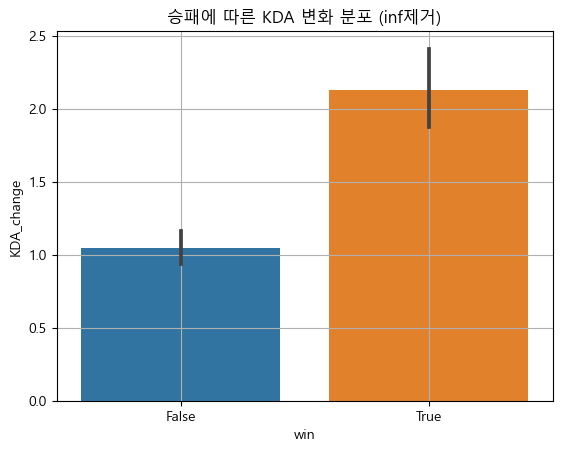

In [42]:
sns.barplot(x='win', y='KDA_change', data=data3)
plt.title("승패에 따른 KDA 변화 분포 (inf제거)")
plt.grid()
plt.show()

In [45]:
data3_win = data3.loc[data3['win'] == True, 'KDA_change']
data3_lose = data3.loc[data3['win'] == False, 'KDA_change']

In [46]:
import scipy.stats as spst

spst.ttest_ind(data3_win, data3_lose)

Ttest_indResult(statistic=6.758221900910903, pvalue=1.042833186874629e-10)

### 특정 column과 승패 여부의 관계

In [65]:
win_means = data3.loc[data3['win'] == True].describe().mean()
lose_means = data3.loc[data3['win'] == False].describe().mean()
# win_stds = data3.loc[data3['win'] == True].describe().std()
# lose_stds = data3.loc[data3['win'] == False].describe().std()

df_means = pd.DataFrame({'win_means':win_means, 'lose_means':lose_means, 'mean_diff':(win_means-lose_means)})
# df_means = pd.DataFrame({'win_means':win_means, 'lose_means':lose_means, 'mean_diff':(win_means-lose_means),
#                          'win_stds':win_stds, 'lose_stds':lose_stds, 'std_per': (win_stds / lose_stds)})
df_means

,win_means,lose_means,mean_diff
kills,24.650812,22.875130,1.775683
deaths,20.752534,20.203499,0.549034
assists,23.562334,20.140776,3.421558
KDA,22.001975,16.701370,5.300605
bountyGold,433.238720,540.931381,-107.692661
turretKills,18.568182,15.633896,2.934286
turretsLost,18.656104,21.190353,-2.534249
totalDamageDone15,37311.408017,37839.222381,-527.814365
totalDamageDoneToChampions15,5573.698040,5371.951549,201.746491
totalDamageTaken15,5051.268683,4964.790271,86.478412


#### 의문
* deaths, totalDamageTaken15, xp15, minionsKilled15 는 큰 차이가 없으며
* bountyGold(현상금)은 오히려 패배할 플레이어 데이터가 더 높다

#### t-검정
* ex) 승리시 킬 수 데이터와 패배시 킬 수 데이터, 두 집단 간 평균의 차이가 있는가

In [47]:
def t_test(col):
    xt = data3.loc[data3['win'] == True, col]
    yt = data3.loc[data3['win'] == False, col]
    ttest = spst.ttest_ind(xt, yt)
    print("win/lose ttest -", col, " :", ttest)
    return ttest

In [76]:
df_tt = pd.DataFrame(columns=['attribute', 'statistic', 'pvalue'])
for col in list(data3)[1:]:
    ttest = t_test(col)
    ttest_dict = {'attribute': col, 'statistic': ttest[0], 'pvalue': ttest[1]}
    df_tt = df_tt.append(ttest_dict, ignore_index=True)

df_tt = df_tt.sort_values('statistic', ascending=False)

df_tt.loc[df_tt['pvalue'] < 0.05, '평균값차이가있음'] = 'O'
df_tt.loc[df_tt['pvalue'] >= 0.05, '평균값차이가있음'] = '없음'
display(df_tt)

win/lose ttest - kills  : Ttest_indResult(statistic=3.5338022587589295, pvalue=0.0004909166986358961)
win/lose ttest - deaths  : Ttest_indResult(statistic=-5.700869953133607, pvalue=3.470200590367774e-08)
win/lose ttest - assists  : Ttest_indResult(statistic=6.3034304968041965, pvalue=1.3754917706337934e-09)
win/lose ttest - KDA  : Ttest_indResult(statistic=7.532184955133177, pvalue=9.998774195463299e-13)
win/lose ttest - bountyGold  : Ttest_indResult(statistic=-4.217848246371906, pvalue=3.492711320396881e-05)
win/lose ttest - turretKills  : Ttest_indResult(statistic=9.959932955348284, pvalue=8.568035928807789e-20)
win/lose ttest - turretsLost  : Ttest_indResult(statistic=-25.261816489090883, pvalue=1.1279360698617744e-69)
win/lose ttest - totalDamageDone15  : Ttest_indResult(statistic=0.28752645284597894, pvalue=0.7739563341667245)
win/lose ttest - totalDamageDoneToChampions15  : Ttest_indResult(statistic=-0.08548616191897761, pvalue=0.9319458715829452)
win/lose ttest - totalDamageTak

,attribute,statistic,pvalue,평균값차이가있음
5,turretKills,9.959933,8.568036e-20,O
3,KDA,7.532185,9.998774e-13,O
18,KDA_change,6.758222,1.042833e-10,O
2,assists,6.303430,1.375492e-09,O
0,kills,3.533802,4.909167e-04,O
17,KDA15,2.153469,3.227424e-02,O
16,assists15,1.483646,1.392094e-01,없음
14,kills15,1.207388,2.284665e-01,없음
13,totalGold15,1.059353,2.904997e-01,없음
12,minionsKilled15,0.740752,4.595648e-01,없음


In [78]:
# |t|값이 2보다 큰 -승패별 attirbute 평균에 차이가 있는- attribute 들
df_tt2 = df_tt[abs(df_tt['statistic']) > 2].sort_values('statistic', ascending=False)
df_tt2

,attribute,statistic,pvalue
5,turretKills,9.959933,8.568036e-20
3,KDA,7.532185,9.998774e-13
18,KDA_change,6.758222,1.042833e-10
2,assists,6.303430,1.375492e-09
0,kills,3.533802,4.909167e-04
17,KDA15,2.153469,3.227424e-02
4,bountyGold,-4.217848,3.492711e-05
1,deaths,-5.700870,3.470201e-08
6,turretsLost,-25.261816,1.127936e-69


In [80]:
print(list(df_tt2['attribute']))

['turretKills', 'KDA', 'KDA_change', 'assists', 'kills', 'KDA15', 'bountyGold', 'deaths', 'turretsLost']


* 'turretKills', 'KDA', 'KDA_change', 'assists', 'kills', 'KDA15', 'bountyGold', 'deaths', 'turretsLost'
* 이와 같은 column들이 승패의 차이를 나타내므로 영향력 있는 지표로 여겨진다.

# 3. 데이터 준비

In [82]:
data4 = data3.copy()

In [84]:
# 승패 True False -> 1, 0
# data = data.replace({'win': {True:1}}, {'win': {False:0}})
data4 = data4.replace(True, 1)
data4 = data4.replace(False, 0)

display(data4['win'].value_counts())
display(data4.head())

1    127
0    116
Name: win, dtype: int64

,win,kills,deaths,assists,KDA,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA15,KDA_change
0,1,19,2,5,12.00,0,5,3,70886,9620,5167,10,6813,150,8133,4,1,2,6.000000,2.0
1,0,7,4,8,3.75,450,2,10,50995,9032,4973,9,5170,126,6097,2,2,3,2.500000,1.5
2,1,8,4,8,4.00,0,4,3,39510,5148,8499,8,4961,108,4679,1,3,1,0.666667,6.0
3,1,13,1,3,16.00,0,4,3,53311,4102,2082,9,5586,138,7735,3,1,1,4.000000,4.0
4,0,2,8,6,1.00,0,0,10,40709,5587,6992,9,5243,116,5821,0,4,5,1.250000,0.8


In [85]:
# x, y 분리
target = 'win'

x = data4.drop(target, axis=1)
y = data4.loc[:, target]

In [86]:
# 가변수화
dumm_cols = ['level15']

x = pd.get_dummies(x, columns=dumm_cols, drop_first=True)
x.head()

,kills,deaths,assists,KDA,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,...,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA15,KDA_change,level15_8,level15_9,level15_10
0,19,2,5,12.00,0,5,3,70886,9620,5167,...,150,8133,4,1,2,6.000000,2.0,0,0,1
1,7,4,8,3.75,450,2,10,50995,9032,4973,...,126,6097,2,2,3,2.500000,1.5,0,1,0
2,8,4,8,4.00,0,4,3,39510,5148,8499,...,108,4679,1,3,1,0.666667,6.0,1,0,0
3,13,1,3,16.00,0,4,3,53311,4102,2082,...,138,7735,3,1,1,4.000000,4.0,0,1,0
4,2,8,6,1.00,0,0,10,40709,5587,6992,...,116,5821,0,4,5,1.250000,0.8,0,1,0


In [87]:
# train, val, test 분리
from sklearn.model_selection import train_test_split

# train:test = 8:2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=data4['win'])

# # train:val:test = 7:2:1
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
# x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.33, random_state=1)


In [90]:
# 정규화
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

# 4. 모델링

## DecisionTree

In [91]:
# 1) 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [92]:
# 2) 선언하기
model_dt = DecisionTreeClassifier(max_depth=5, random_state=1)

In [93]:
# 3) 학습하기
model_dt.fit(x_train_s, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [94]:
# 4) 예측하기
y_pred = model_dt.predict(x_test_s)

In [95]:
# 5) 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  3]
 [ 0 26]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        23
           1       0.90      1.00      0.95        26

    accuracy                           0.94        49
   macro avg       0.95      0.93      0.94        49
weighted avg       0.95      0.94      0.94        49



## RandomForest

In [96]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(max_depth=5, random_state=1)

model_rf.fit(x_train_s, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [97]:
y_pred = model_rf.predict(x_test_s)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22  1]
 [ 0 26]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.96      1.00      0.98        26

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



# 5. 시각화 및 변수 중요도

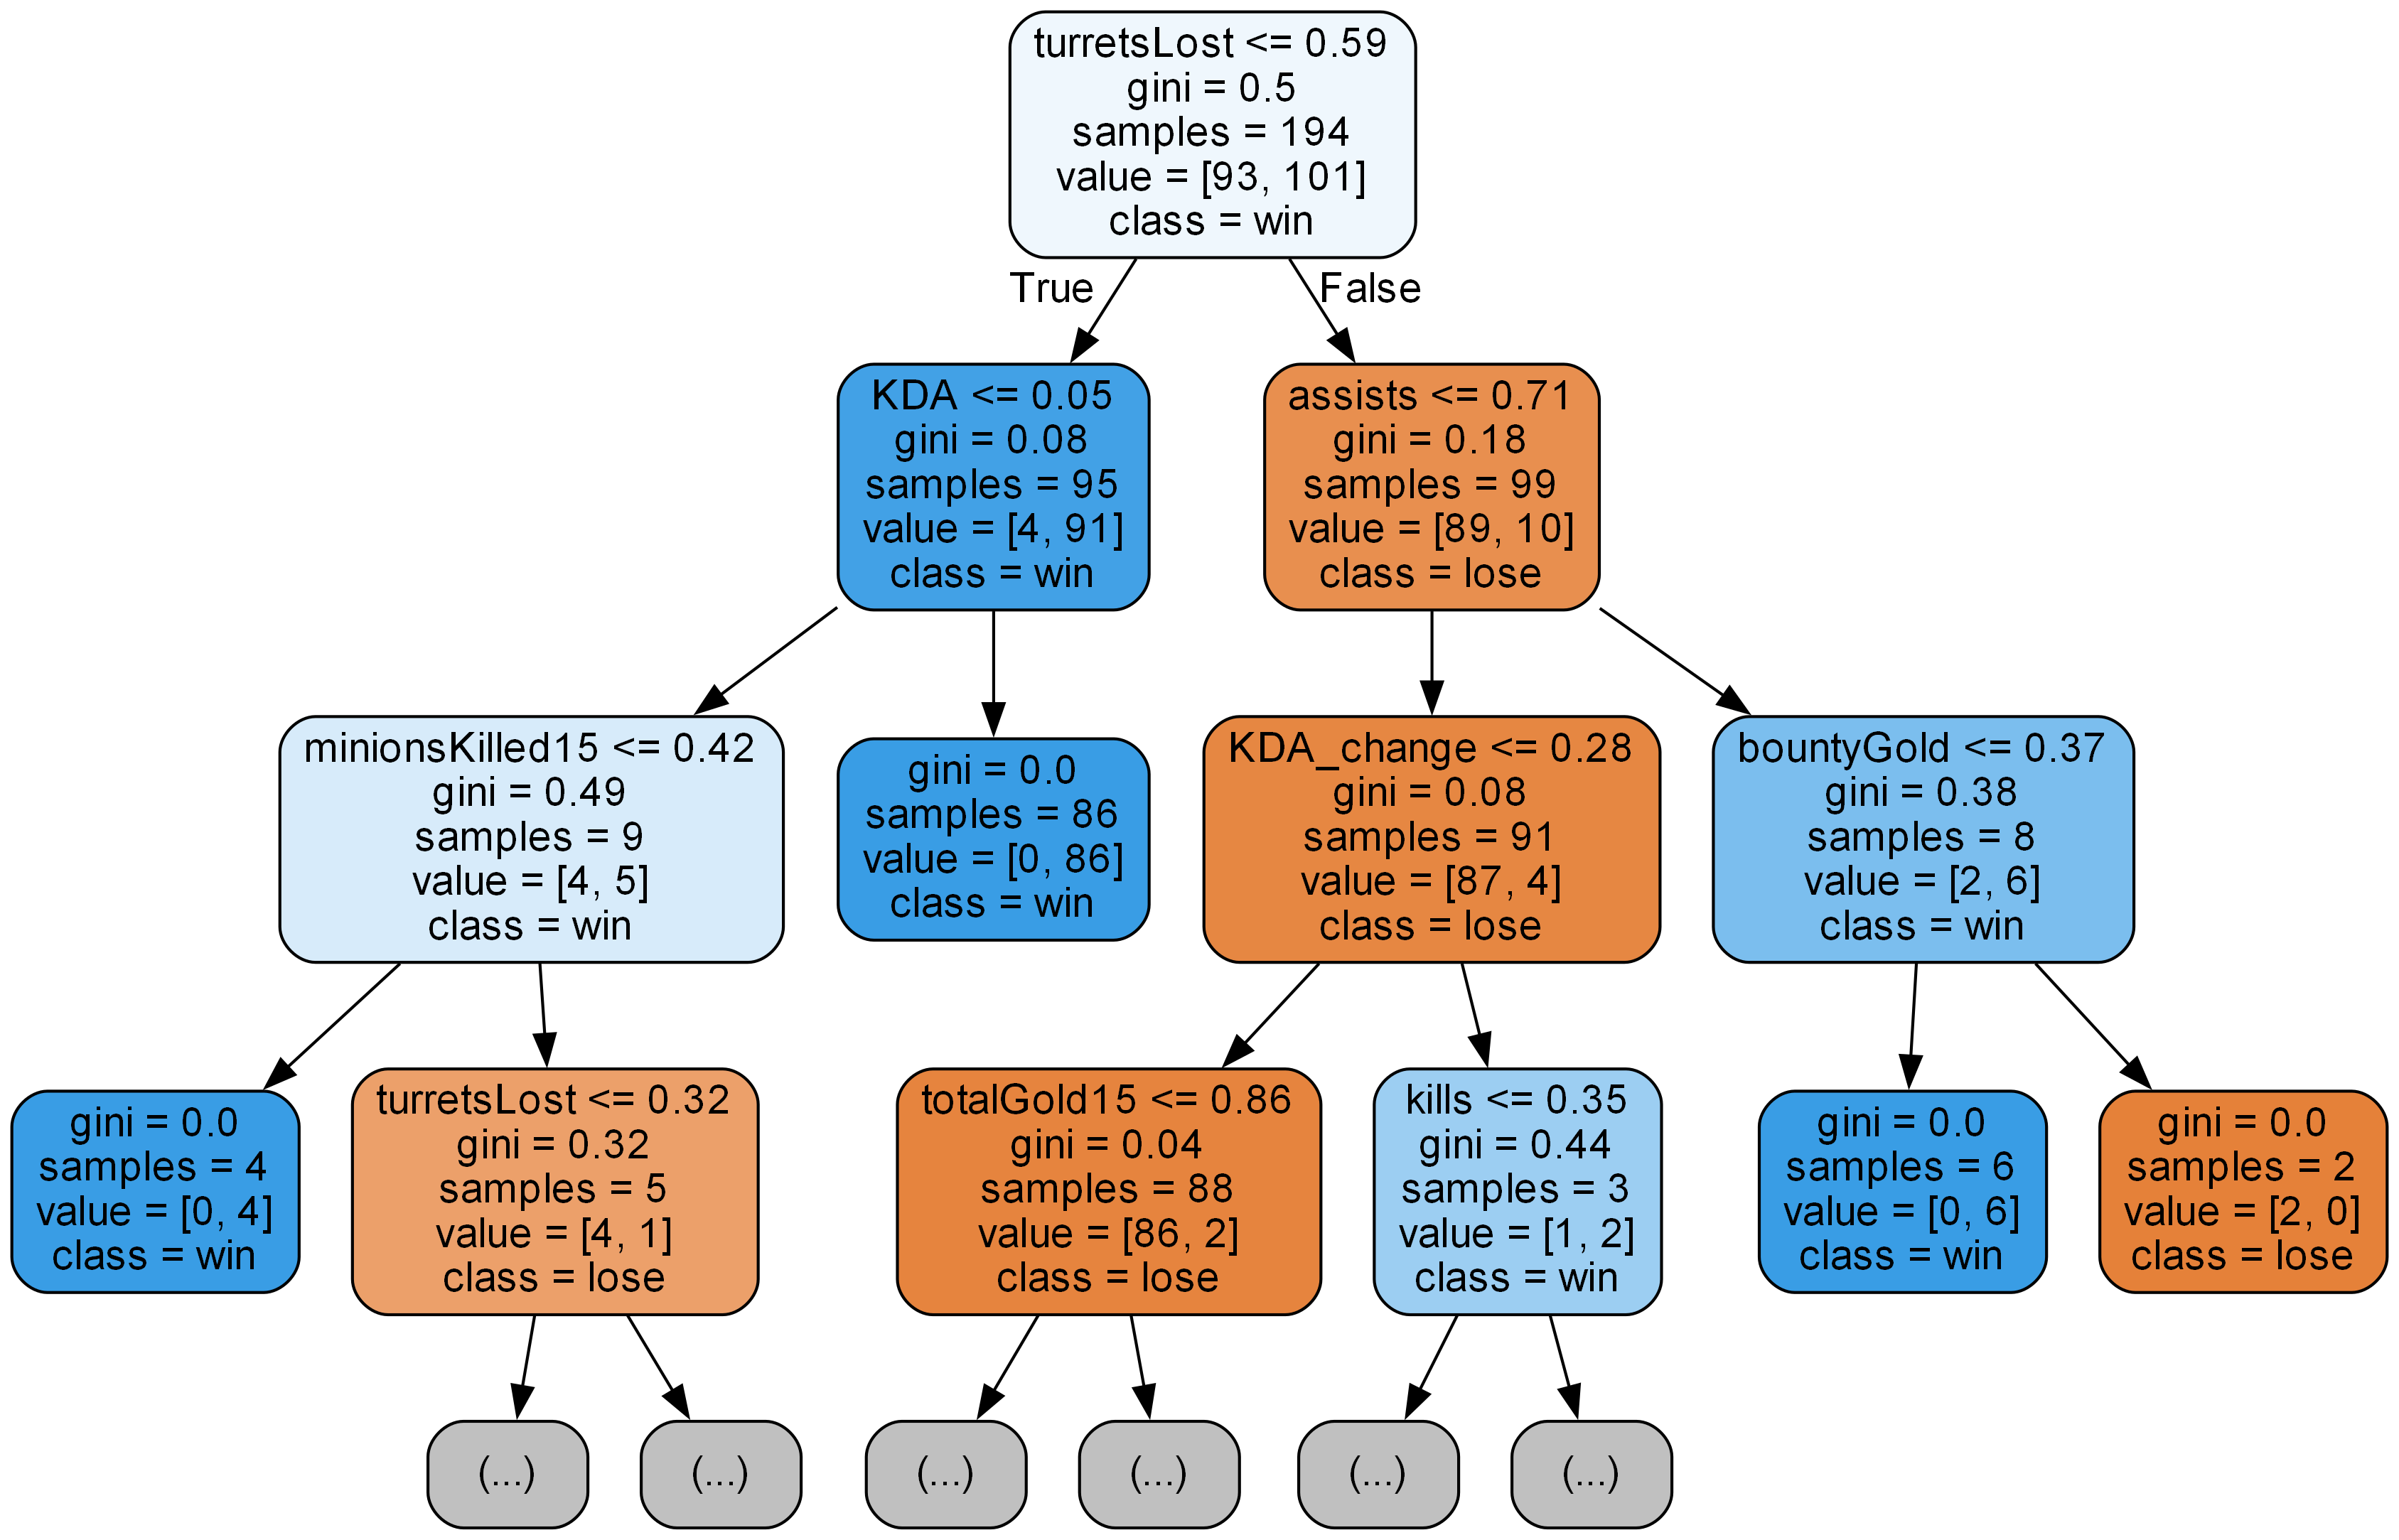

In [99]:
# 시각화 모듈 불러오기
from sklearn.tree import export_graphviz
from IPython.display import Image

# 이미지 파일 만들기
export_graphviz(model_dt,                                 # 모델 이름
                out_file='dt_tree.dot',                   # 파일 이름 
                feature_names=x.columns,               # Feature 이름
                class_names=['lose', 'win'],           # Target Class 이름
                rounded=True,                          # 둥근 테두리
                precision=2,                           # 불순도 소숫점 자리수
                max_depth=3,                           # 출력할 트리 깊이
                filled=True)                           # 박스 내부 채우기

# 파일 변환
!dot dt_tree.dot -Tpng -odt_tree.png -Gdpi=300

# 이미지 파일 표시
Image(filename='dt_tree.png')

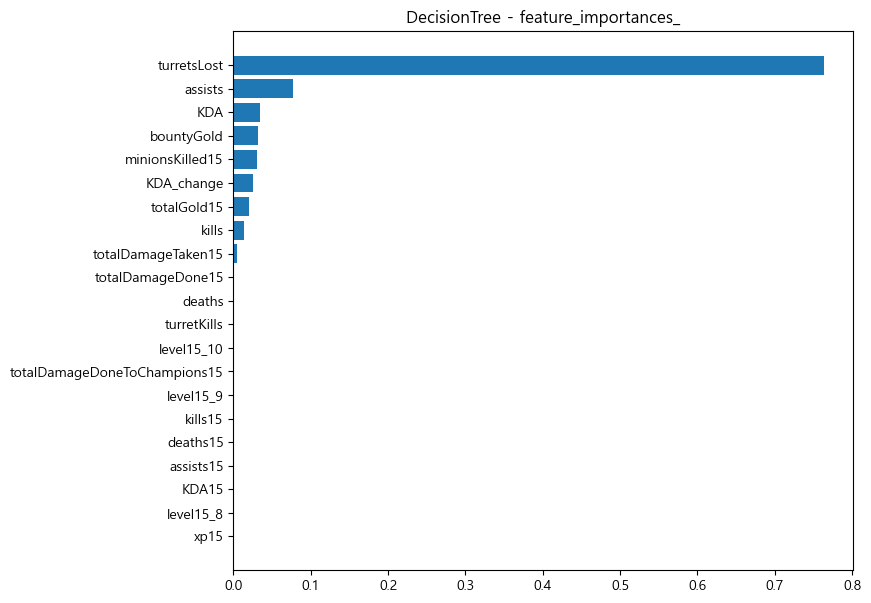

In [101]:
# 변수 중요도 정렬
dt_features_dic = {'feature':list(x), 'importance': model_dt.feature_importances_}
df_dt = pd.DataFrame(dt_features_dic)
df_dt.sort_values(by='importance', ascending=True, inplace=True)

# 시각화
plt.figure(figsize=(8, 7))
plt.barh(df_dt['feature'], df_dt['importance'])
plt.title('DecisionTree - feature_importances_')
plt.show()

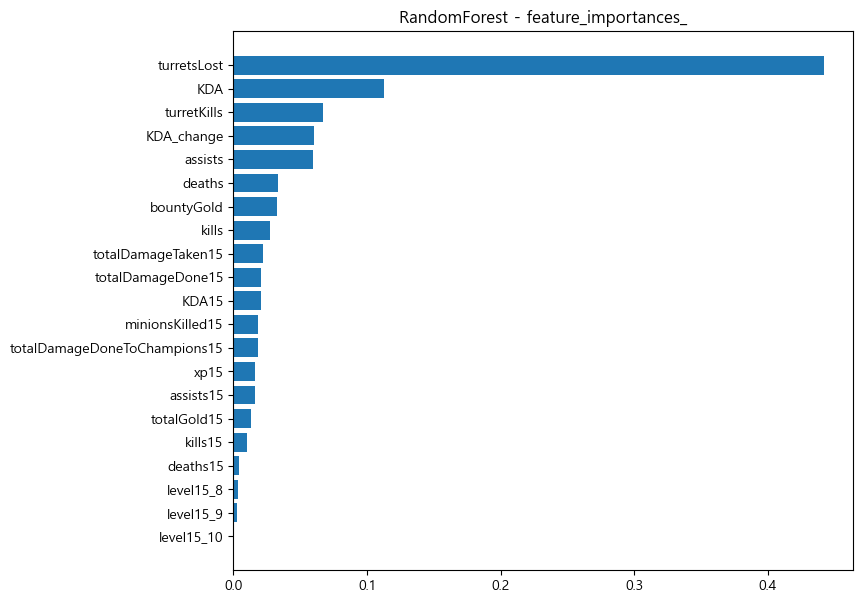

In [103]:
# 변수 중요도 정렬
rf_features_dic = {'feature':list(x), 'importance': model_rf.feature_importances_}
df_rf = pd.DataFrame(rf_features_dic)
df_rf.sort_values(by='importance', ascending=True, inplace=True)

# 시각화
plt.figure(figsize=(8, 7))
plt.barh(df_rf['feature'], df_rf['importance'])
plt.title('RandomForest - feature_importances_')
plt.show()

# 6. 인사이트

* ~ 데이터가 중요함
* 실제로는 영향력이 ~